# Bike Lane Analysis

In this document we perform basic exploratory data analysis to give suggestions of where Denver should build new bike lanes. We perform a few different techniques to paint an overall picture of the scenario.

### Who Can Safely Bike to CU Denver

In [3]:
import numpy as np
import pandas as pd
import geopandas as gpd
from shapely import wkt
import matplotlib.pyplot as plt

In [2]:
# infeasible_nodes_CU = np.where(distance_CU == np.Inf)[0]
# type(infeasible_nodes_CU)

NameError: name 'distance_CU' is not defined

In [48]:
def node_plotting(url,edge_info, node_info, string):
    data_CU = np.genfromtxt(url, delimiter=",")
    distance_CU = data_CU[:,-1]
    #nodes that can reach destination safely
    feasible_nodes_CU = np.where(distance_CU < np.Inf)[0]
    # nodes that cannot get to destination safely
    infeasible_nodes_CU = np.where(distance_CU == np.Inf)[0]
    
    #get coordinates of feasible nodes
    feasible_node_coords = node_info[node_info['node'].isin(feasible_nodes_CU)]
    feasible_node_gdf = gpd.points_from_xy(feasible_node_coords.long, feasible_node_coords.lat, crs="EPSG:4326")

    #get coordnates of infeasible nodes
    infeasible_node_coords = node_info[node_info['node'].isin(infeasible_nodes_CU)]
    infeasible_node_gdf = gpd.points_from_xy(infeasible_node_coords.long, infeasible_node_coords.lat, crs="EPSG:4326")

    #convert edge_data to geopandas dataframe for plotting
    #for some reason you need to comment out this line if you are running the plot for the same dataset twice in a row
    edge_info['geometry'] = edge_info['geometry'].apply(wkt.loads)
    edge_gdf = gpd.GeoDataFrame(edge_info, geometry = edge_info['geometry'])
    
    #plot all things on same figure and save it
    f, ax = plt.subplots(1, 1, figsize=(20, 20), sharex=True, sharey=True)
    edge_gdf.plot(linewidth = 4,color='black', ax=ax, zorder=-1, aspect = 1)
    (gpd.GeoDataFrame(feasible_node_gdf, geometry=feasible_node_gdf)).plot(markersize = 50,color = 'green', ax = ax, aspect = 1)
    (gpd.GeoDataFrame(infeasible_node_gdf, geometry=infeasible_node_gdf)).plot(markersize = 50,color = 'red', ax = ax, aspect = 1)
    ax.axis("off")
    plt.title('%s Cautious Cyclist' %string, fontsize = 30)
#     plt.savefig(string+'.png')
    plt.show()

In [52]:
url_CU = "https://raw.githubusercontent.com/DillWithIt77/D2P_Spring_2022/main/tau_results/auraria_tau_distances_cautious.csv"
string = 'Auraria'

# url_CU = "https://raw.githubusercontent.com/DillWithIt77/D2P_Spring_2022/main/tau_results/DU_tau_distances_cautious.csv"
# string = 'University of Denver'

# url_CU = "https://raw.githubusercontent.com/DillWithIt77/D2P_Spring_2022/main/tau_results/citypark_tau_distances_cautious.csv"
# string = 'City Park'

# url_CU = "https://raw.githubusercontent.com/DillWithIt77/D2P_Spring_2022/main/tau_results/5points_tau_distances_cautious.csv"
# string = '5 Points'

# url_CU = "https://raw.githubusercontent.com/DillWithIt77/D2P_Spring_2022/main/tau_results/union_tau_distances_cautious.csv"
# string = 'Union Station'

#import nodes and edges with lat/long coordinates
edge_info = pd.read_csv('plot_edge_data.csv', names = ['tail','head','existing_f','fullname','fromname','toname','start','end','line','path_codes','dist','geometry'],header = 0)
node_info = pd.read_csv('plot_node_data.csv', names = ['long', 'lat', 'node'], header = 0)

In [50]:
# edge_info

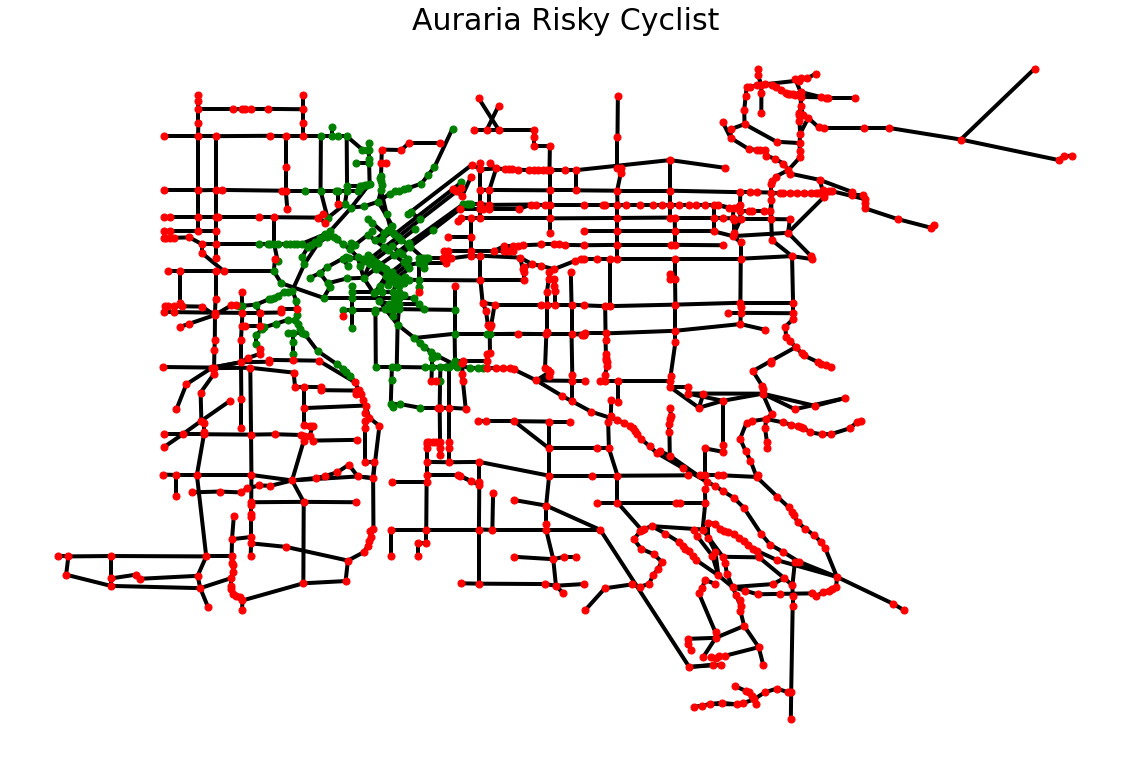

In [53]:
node_plotting(url_CU, edge_info, node_info, string)

### Which Routes Should Be Shortened

In this block, we analyze nodes that are much further from CU Denver by biking safely than by throwing caution to the wind and riding wherever we want.

In [6]:
# Read in data
url_CU_shortest = "https://raw.githubusercontent.com/DillWithIt77/D2P_Spring_2022/main/shortest_path_res/auraria_res.csv"
data_CU_shortest = np.genfromtxt(url_CU_shortest, delimiter=",")[1:,1]
#distance of shortest paths feasible with tau
shortdist_CU_feas = data_CU_shortest[feasible_nodes_CU]
#distance of shortest paths that are feasible with cautious tau
taudist_CU_feas = distance_CU[feasible_nodes_CU]

In [9]:
# Absolute Increase
dist_inc = taudist_CU_feas - shortdist_CU_feas
big_inc = np.argsort(dist_inc)[::-1]
increased_nodes = feasible_nodes_CU[big_inc]

# 5 greatest increased
increased_nodes[:5]
#nodes that were the farthest away from destination
#get distance increase between shortest path and tau path
distance_CU[998]- data_CU_shortest[998]

1.14208025133222

In [ ]:
#plot tau and shortest path for starting 5 nodes from above to auraria

In [ ]:
#so ignore normalized stuff

In [61]:
# Length Normalized Increase 
dist_inc_N = np.array([(taudist_CU_feas[i] - shortdist_CU_feas[i])/shortdist_CU_feas[i] if shortdist_CU_feas[i] != 0 else 0 
                       for i in range(len(taudist_CU_feas))])
big_inc_N = np.argsort(dist_inc_N)[::-1]
increased_nodes_N = feasible_nodes_CU[big_inc_N]

In [60]:
# Notice the indices didnt change much
# So probably don't need to worry about this kind of analysis
print(big_inc_N - big_inc)

[   0    0    0    0    0  188 -188    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0 

In [63]:
# Angela can you plot the shortest path and tau shortest path in one plot?
# Maybe make 3-5 plots for the greatest increases
# This is Auraria so node 26.
# 5 greatest increased are 998, 725,  87, 909, 847
# Can you highlight the shared lane and unprotected bike lanes?